In [1]:
!pip install PyMySQL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 692.6 kB/s eta 0:00:00


In [6]:
import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input("Enter password:")

# Connect to the database
connection = pymysql.connect(host=host, user=usr, password=psword, database=db, cursorclass=pymysql.cursors.DictCursor)

Enter password:xxxx


In [4]:
sql = "SELECT * FROM situation.s19_biologicalassays"

with connection.cursor() as cursor:
   cursor.execute(sql)
   results = cursor.fetchall()
   column_names = [desc[0] for desc in cursor.description]  # Get column names from the cursor description

# Initialize an empty DataFrame with the column names
df = pd.DataFrame(columns=column_names)

# Collect all rows in a list
rows = []

# Loop through the fetched results and add each row to the list
for row in results:
   rows.append(pd.Series(row, index=column_names))

# Convert the list of rows to a DataFrame and concatenate it with the initial empty DataFrame
df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)


connection.close()
print(df)

   assay_id compound_name    target  assay_type measurement_type  \
0         1     CompoundA  ProteinX     Binding               Kd   
1         2     CompoundB  ProteinY  Inhibition             IC50   
2         3     CompoundC  ProteinZ  Activation             EC50   
3         4     CompoundD  ProteinA     Binding               Kd   
4         5     CompoundE  ProteinB  Inhibition             IC50   
5         6     CompoundF  ProteinC  Activation             EC50   
6         7     CompoundG  ProteinD     Binding               Kd   
7         8     CompoundH  ProteinE  Inhibition             IC50   
8         9     CompoundI  ProteinF  Activation             EC50   
9        10     CompoundJ  ProteinG     Binding               Kd   
10       11     CompoundK  ProteinH  Inhibition             IC50   
11       12     CompoundL  ProteinI  Activation             EC50   
12       13     CompoundM  ProteinJ     Binding               Kd   
13       14     CompoundN  ProteinK  Inhibition 

Minimum value: 0.2
Maximum value: 8.0
Range: 7.8


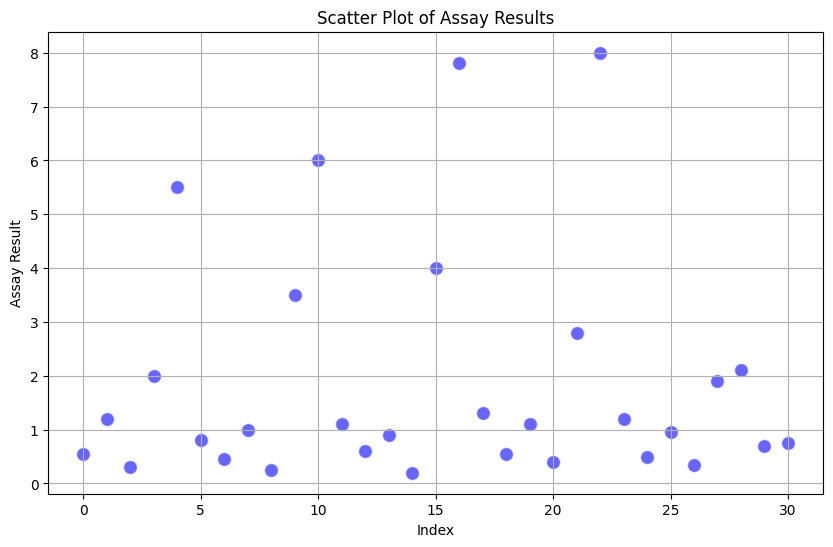

In [7]:
# Calculate minima, maxima, and range
minima = df['assay_result'].min()
maxima = df['assay_result'].max()
ranges = maxima - minima

print(f"Minimum value: {minima}")
print(f"Maximum value: {maxima}")
print(f"Range: {ranges}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['assay_result'], color='blue', alpha=0.6, edgecolor='w', s=100)
plt.title('Scatter Plot of Assay Results')
plt.xlabel('Index')
plt.ylabel('Assay Result')
plt.grid(True)
plt.show()